**Exploratory Data Analysis** 

In [1]:
import pandas as pd # for DataFrame
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import numpy as np # for numpy

In [4]:
"""Load the dataset"""
# Takes data with missing values handled before
data = pd.read_csv('august_data/df_missing_value_handled.csv', index_col=0)

"""Print the first 5 rows of the dataset"""
data.head(5)

,day,adFlag,availability,click,basket,order,price,revenue,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,rrp,compPrice
0,1,0,2,1,0,0,16.89,0.00,255,2FOI,50,ML,TRO,0,40,193.0,18.25,14.60
1,1,1,1,0,1,0,8.75,0.00,18,1COJ0FIK,50,ST,TAB,1,40,66.0,18.81,8.57
2,1,0,1,0,1,0,16.06,0.00,41,22OI7,2X50,ML,STI,0,53,40.0,18.48,14.77
3,1,1,1,0,0,1,6.55,6.55,52,18OZ00IS,60,G,GEL,0,40,25.0,9.31,6.59
4,1,0,1,0,0,1,4.14,4.14,90,20OI0,25X2,ST,KOM,0,53,14.0,8.13,4.39


In [15]:
"""Basic Data info"""
print(f"Shape of data: {data.shape}\n")
# describe
print(f"Describing data: \n {data.info()}")

Shape of data: (2668609, 18)

<class 'pandas.core.frame.DataFrame'>
Index: 2668609 entries, 0 to 2756002
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   day             int64  
 1   adFlag          int64  
 2   availability    int64  
 3   click           int64  
 4   basket          int64  
 5   order           int64  
 6   price           float64
 7   revenue         float64
 8   manufacturer    int64  
 9   group           object 
 10  content         object 
 11  unit            object 
 12  pharmForm       object 
 13  genericProduct  int64  
 14  salesIndex      int64  
 15  category        float64
 16  rrp             float64
 17  compPrice       float64
dtypes: float64(5), int64(9), object(4)
memory usage: 386.8+ MB
Describing data: 
 None


In [17]:
"""Numerical and Categorical columns"""
cat_cols = ['group', 'content', 'unit', 'pharmForm']
num_cols = [i for i in data.columns if i not in cat_cols]

In [19]:
print(f"Categorical columns : {cat_cols}")
print(f"Numerical columns : {num_cols}")

Categorical columns : ['group', 'content', 'unit', 'pharmForm']
Numerical columns : ['day', 'adFlag', 'availability', 'click', 'basket', 'order', 'price', 'revenue', 'manufacturer', 'genericProduct', 'salesIndex', 'category', 'rrp', 'compPrice']


In [20]:
# We dont want 'day'
num_cols = num_cols[1:]

*Outliers*

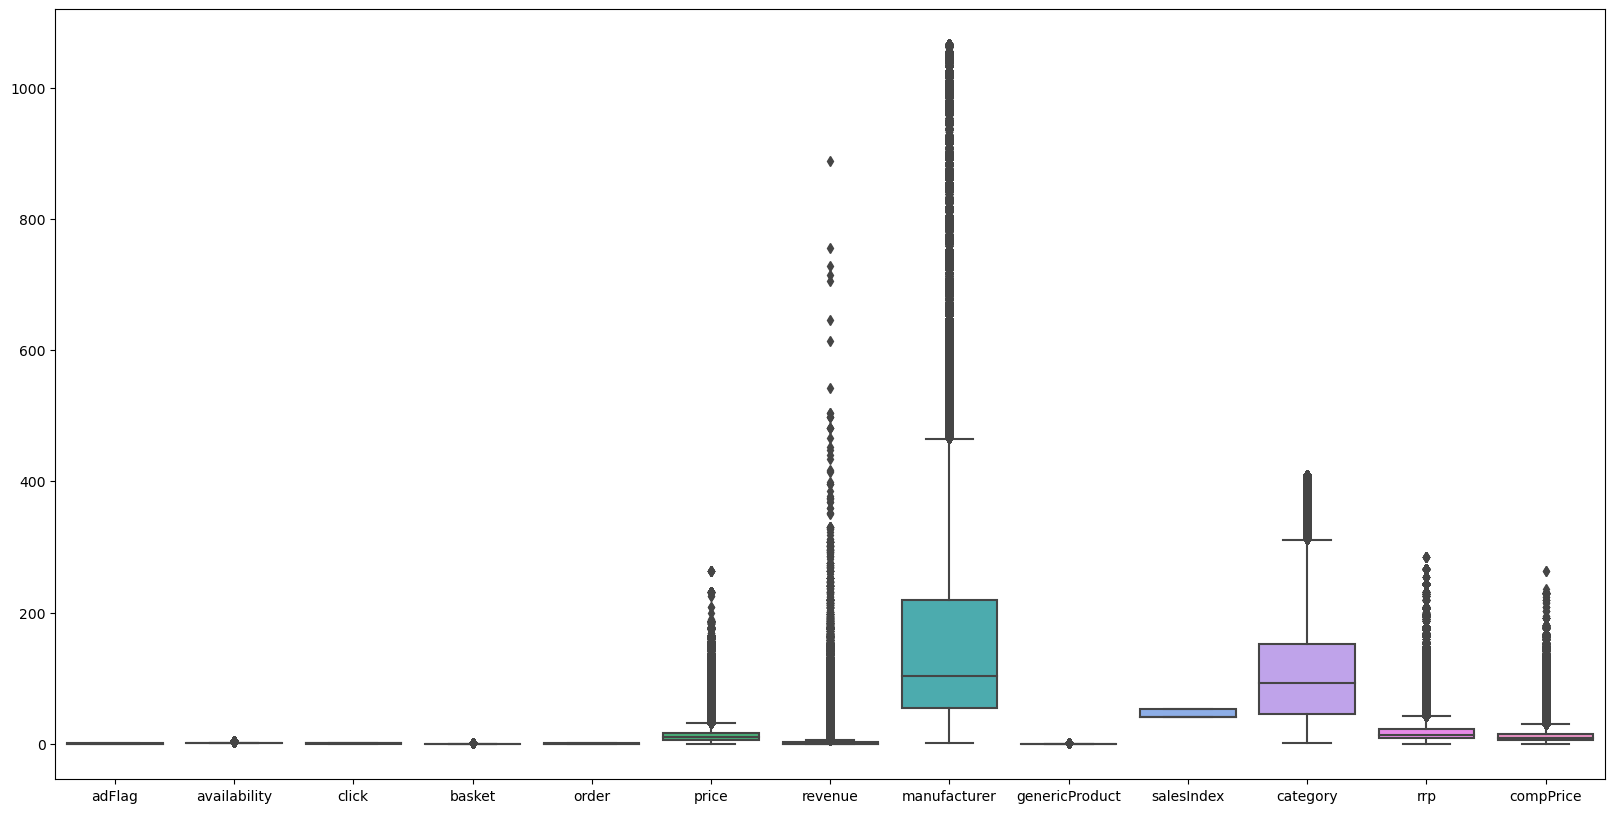

In [21]:
# Let's find outliers in numerical columns
# We will use Box plot for this

plt.figure(figsize=(20, 7))
sns.boxplot(data=data[num_cols])
plt.show()

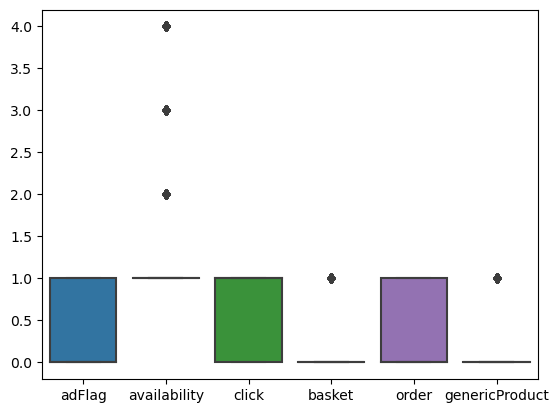

In [22]:
# Separate box plot for cols with low values 
sns.boxplot(data = data[['adFlag', 'availability', 'click', 'basket', 'order', 'genericProduct']])
plt.show()
# We wont consider this

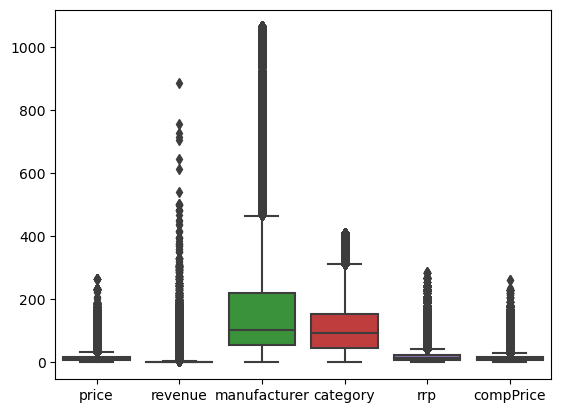

In [23]:
outlier_cols = ['price', 'revenue', 'manufacturer', 'category', 'rrp', 'compPrice']

sns.boxplot(data = data[outlier_cols])
plt.show()

In [24]:
"""Outlier removal function"""

def get_outliers(data, whisker_factor=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_whisker = q1 - whisker_factor * iqr
    upper_whisker = q3 + whisker_factor * iqr
    outliers = [x for x in data if x < lower_whisker or x > upper_whisker]
    return outliers, len(outliers), lower_whisker, upper_whisker

In [25]:
# For revenue
out, n_out, l, u = get_outliers(data['revenue'])

In [26]:
# So, we cannot actually remove the outliers
# one thing can be done that is transformation(log transformation to bring the data closer to mean)

In [27]:
data

,day,adFlag,availability,click,basket,order,price,revenue,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,rrp,compPrice
0,1,0,2,1,0,0,16.89,0.00,255,2FOI,50,ML,TRO,0,40,193.0,18.25,14.60
1,1,1,1,0,1,0,8.75,0.00,18,1COJ0FIK,50,ST,TAB,1,40,66.0,18.81,8.57
2,1,0,1,0,1,0,16.06,0.00,41,22OI7,2X50,ML,STI,0,53,40.0,18.48,14.77
3,1,1,1,0,0,1,6.55,6.55,52,18OZ00IS,60,G,GEL,0,40,25.0,9.31,6.59
4,1,0,1,0,0,1,4.14,4.14,90,20OI0,25X2,ST,KOM,0,53,14.0,8.13,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755998,92,0,1,1,0,0,18.64,0.00,917,22OIE,15,ML,LOT,0,53,15.0,24.75,22.41
2755999,92,0,1,1,0,0,43.18,0.00,18,14OH2F,200,ST,KAP,0,40,100.0,46.09,36.87
2756000,92,0,1,1,0,0,5.59,0.00,334,21OKF,25,ST,DRA,0,53,1.0,5.88,4.71
2756001,92,1,1,0,1,0,6.33,0.00,84,13OK0FOK,50,G,SAL,0,40,90.0,9.58,6.59


Exploratory Analysis

In [28]:
"""Univariate Analysis"""

data.columns

Index(['day', 'adFlag', 'availability', 'click', 'basket', 'order', 'price',
       'revenue', 'manufacturer', 'group', 'content', 'unit', 'pharmForm',
       'genericProduct', 'salesIndex', 'category', 'rrp', 'compPrice'],
      dtype='object')

In [29]:
# df[''].unique()
# Columns for univariate analysis
uni_col = ['price', 'revenue', 'manufacturer', 'rrp', 'compPrice']

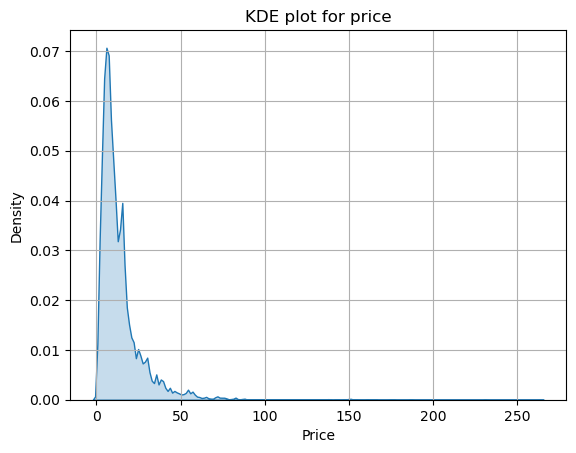

In [30]:
# Price
sns.kdeplot(data = data, x = 'price', fill = True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('KDE plot for price')
plt.grid(True)
plt.show()

In [31]:
### Skewed towards 0
price_info = dict(data['price'].describe())
price_info

{'count': 2668609.0,
 'mean': 13.795504680528325,
 'std': 13.502578960912816,
 'min': 0.02,
 '25%': 5.96,
 '50%': 9.85,
 '75%': 16.45,
 'max': 263.53}

In [33]:
# The 75th percentile value is 16.45
# and after that the max value is 263
print(f"length of price col: {len(data['price'])}")

# ---> We get that most price values are below 16

length of price col: 2668609


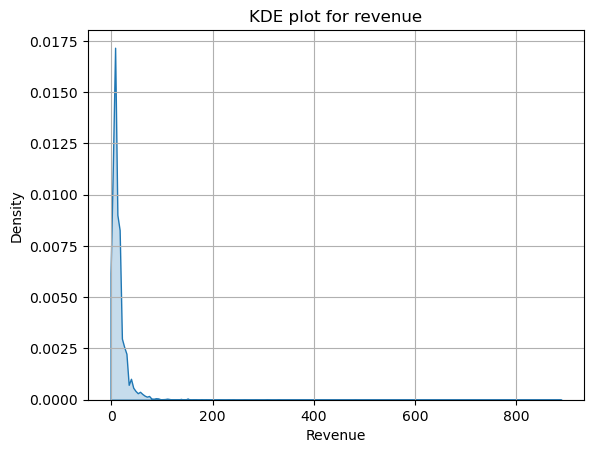

In [34]:
# Revenue
sns.kdeplot(data = data, x = 'revenue', fill = True)
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.title('KDE plot for revenue')
plt.grid(True)
plt.show()

In [37]:
### Skewed 
rev_info = dict(data['revenue'].describe())
rev_info 

{'count': 2668609.0,
 'mean': 3.7835291719393878,
 'std': 10.28077809578175,
 'min': 0.0,
 '25%': 0.0,
 '50%': 0.0,
 '75%': 2.15,
 'max': 887.7}

In [39]:
len(data[data['revenue']> 50.15])
# ---> Revenue is mostly around 1-10 for most part

23209

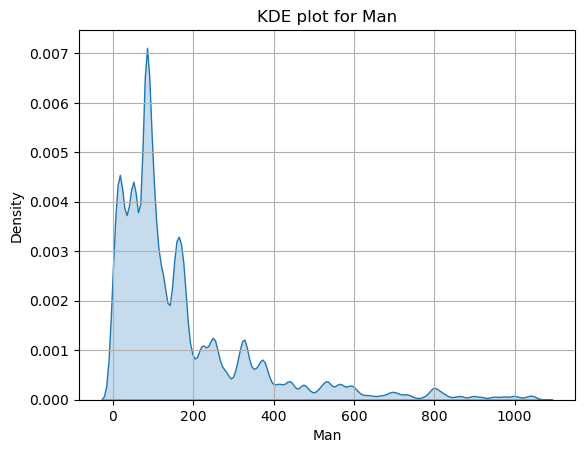

In [40]:
# Revenue
sns.kdeplot(data = data, x = 'manufacturer', fill = True)
plt.xlabel('Man')
plt.ylabel('Density')
plt.title('KDE plot for Man')
plt.grid(True)
plt.show()

In [41]:
man_info = dict(data['manufacturer'].describe())
man_info

{'count': 2668609.0,
 'mean': 171.19414159211783,
 'std': 183.8312874030783,
 'min': 1.0,
 '25%': 55.0,
 '50%': 103.0,
 '75%': 219.0,
 'max': 1066.0}

In [43]:
"""Bivariate Analysis"""

df = pd.read_csv('august_data/df_missing_value_handled.csv', index_col=0)
df.head(5)

,day,adFlag,availability,click,basket,order,price,revenue,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,rrp,compPrice
0,1,0,2,1,0,0,16.89,0.00,255,2FOI,50,ML,TRO,0,40,193.0,18.25,14.60
1,1,1,1,0,1,0,8.75,0.00,18,1COJ0FIK,50,ST,TAB,1,40,66.0,18.81,8.57
2,1,0,1,0,1,0,16.06,0.00,41,22OI7,2X50,ML,STI,0,53,40.0,18.48,14.77
3,1,1,1,0,0,1,6.55,6.55,52,18OZ00IS,60,G,GEL,0,40,25.0,9.31,6.59
4,1,0,1,0,0,1,4.14,4.14,90,20OI0,25X2,ST,KOM,0,53,14.0,8.13,4.39


In [44]:
df.columns

Index(['day', 'adFlag', 'availability', 'click', 'basket', 'order', 'price',
       'revenue', 'manufacturer', 'group', 'content', 'unit', 'pharmForm',
       'genericProduct', 'salesIndex', 'category', 'rrp', 'compPrice'],
      dtype='object')

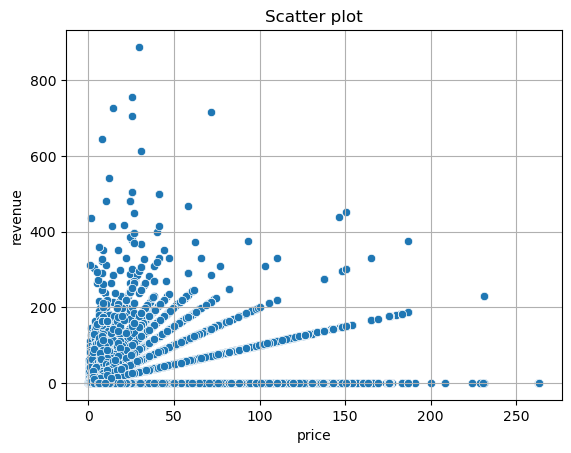

In [45]:
# price vs revenue 
x = 'price'
y = 'revenue'
sns.scatterplot(data=df, x=x, y=y)
plt.xlabel(x)
plt.ylabel(y)
plt.title("Scatter plot")
plt.grid(True)
plt.show()

In [46]:
# Define Correlation 

corr = df['price'].corr(df['revenue'])
print(f"Correlation: {corr}")

if abs(corr) >= 0.8: 
    print("Highly Correlated")
else:
    print("Correlation Seems acceptable")

Correlation: 0.2214267246506234
Correlation Seems acceptable


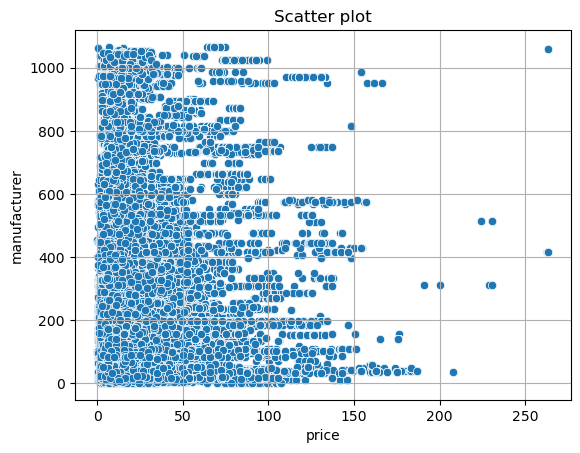

In [47]:
# price vs revenue 
x = 'price'
y = 'manufacturer'
sns.scatterplot(data=df, x=x, y=y)
plt.xlabel(x)
plt.ylabel(y)
plt.title("Scatter plot")
plt.grid(True)
plt.show()

In [48]:
print(f"Correlation between price and manufacturer: {df['price'].corr(df['manufacturer'])}")
print(f"Correlation between price and rrp: {df['price'].corr(df['rrp'])}")
print(f"Correlation between price and competitor price: {df['price'].corr(df['compPrice'])}")
print(f"Correlation between revenue and manufacturer: {df['revenue'].corr(df['manufacturer'])}")
print(f"Correlation between revenue and rrp: {df['revenue'].corr(df['rrp'])}")
print(f"Correlation between revenue and competitor price: {df['revenue'].corr(df['compPrice'])}")
print(f"Correlation between rrp and competitor price: {df['rrp'].corr(df['compPrice'])}")


Correlation between price and manufacturer: 0.12108529028044274
Correlation between price and rrp: 0.9354254433063806
Correlation between price and competitor price: 0.9577776992821155
Correlation between revenue and manufacturer: -0.007631032442371783
Correlation between revenue and rrp: 0.22740090591109877
Correlation between revenue and competitor price: 0.21496012802703182
Correlation between rrp and competitor price: 0.9659869242207028


In [50]:
# Selective columns
cols = ['price', 'revenue', 'manufacturer', 'rrp', 'compPrice']
def is_correlated(cols): 
    """
    This function takes a list of columns and returns those with more than 90% correlation
    Args:
        cols: A list of column names. 
    Returns:
        A list of highly correlated columns
    """
    c_l = []
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            corr = df[cols[i]].corr(df[cols[j]])
            if abs(corr) >= 0.9:
                # print(f"Columns {cols[i]} and {cols[j]} are highly correlated") 
                s = f"Column {cols[i]} and {cols[j]} with value: {corr}"
                c_l.append(s)
    
    return c_l


# Usage 
cl = is_correlated(cols)
for i in cl: 
    print(i)

Column price and rrp with value: 0.9354254433063806
Column price and compPrice with value: 0.9577776992821155
Column rrp and compPrice with value: 0.9659869242207028


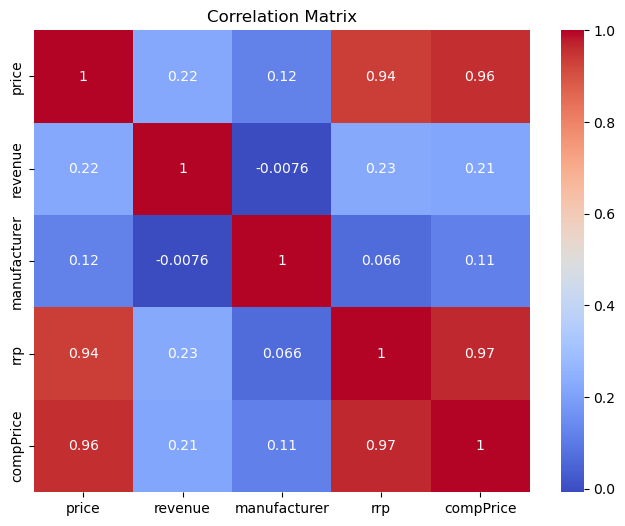

In [51]:
"""Heatmap"""

plt.figure(figsize=(8, 6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [53]:
# ---EDA ends---